In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("Bikeshare Data.csv")

In [3]:
dataset.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Feature Engineering

In [8]:
# Creating new columns from datetime columns

In [9]:
type(dataset['datetime'].iloc[0])

str

In [10]:
# Changing the format of datetime column from string to Datetime objects
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

In [11]:
type(dataset['datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Create new columns "date,"hour","weekDay","month" from "datetime" column.

In [18]:
dataset['date'] = dataset['datetime'].iloc[0]
dataset['hour'] = dataset['datetime'].apply(lambda time: time.hour)
dataset['month'] = dataset['datetime'].apply(lambda time: time.month)
dataset['weekday'] = dataset['datetime'].apply(lambda time: time.dayofweek)

In [19]:
dataset.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,5


In [20]:
type(dataset['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Mapping values to categories

In [21]:
dataset["season"] = dataset.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dataset["weather"] = dataset.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

Creating a category type list

In [22]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for variable in categoryVariableList:
    dataset[variable] = dataset[variable].astype("category")

In [23]:
dataset.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,5
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,5


Dropping the datetime column

In [24]:
dataset = dataset.drop(["datetime"],axis=1)

In [25]:
dataset.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,weekday
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,5
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,5


#  Checking missing values and skewness in distribution

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

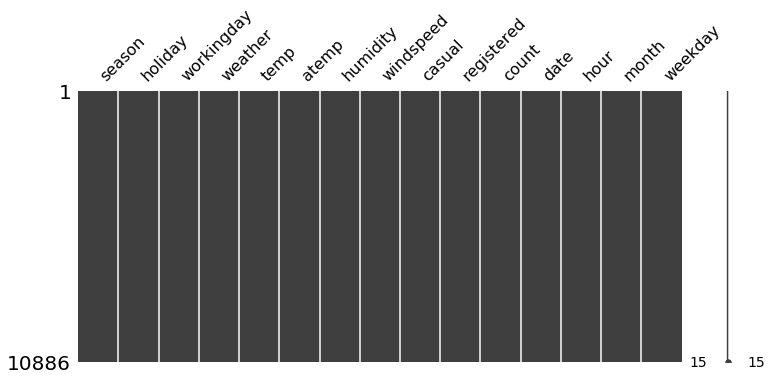

In [28]:
msno.matrix(dataset,figsize=(12,5))

There are no misssing values in the data

In [32]:
dataset.skew(axis = 0, skipna = True)

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

# Outlier Analysis

Creating boxplots to check for outliers in the count column

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

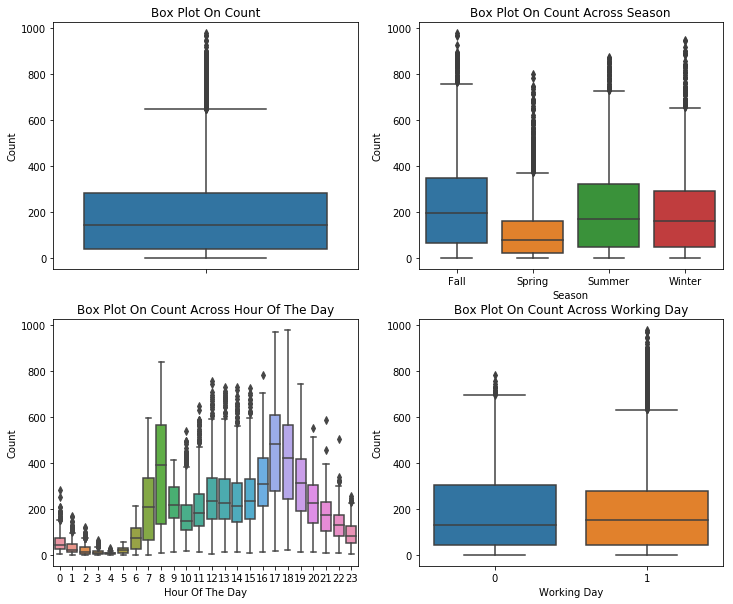

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.boxplot(data=dataset, y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=dataset, x="season", y="count",orient="v",ax=axes[0][1])
sns.boxplot(data=dataset, x="hour", y="count",orient="v",ax=axes[1][0])
sns.boxplot(data=dataset, x="workingday", y="count",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

# From the above boxplots the following inferences can be made:

<ol>
<li> Spring season has a very low count as there is a clear drop in the median value.</li> 
<li>During the hours between 7-8 and 17-18 we can clearly see that median values are relatively higher.</li> 
<li>Outliers are mostly on the working days rather than non working days.</li> 
</ol>

<H2> Removing Outliers </H2>

In [36]:
dataset_without_outliers = dataset[np.abs(dataset["count"]-dataset["count"].mean()) <= (3*dataset["count"].std())]

In [37]:
print ("Shape Of The Before Ouliers: ",dataset.shape)
print ("Shape Of The After Ouliers: ",dataset_without_outliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


# Correlation
<h3>Checking correlation between numerical features</h3>

In [38]:
dataset_without_outliers.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,weekday
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,5
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,5


In [41]:
correlation_matrix = dataset_without_outliers[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
correlation_matrix
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False

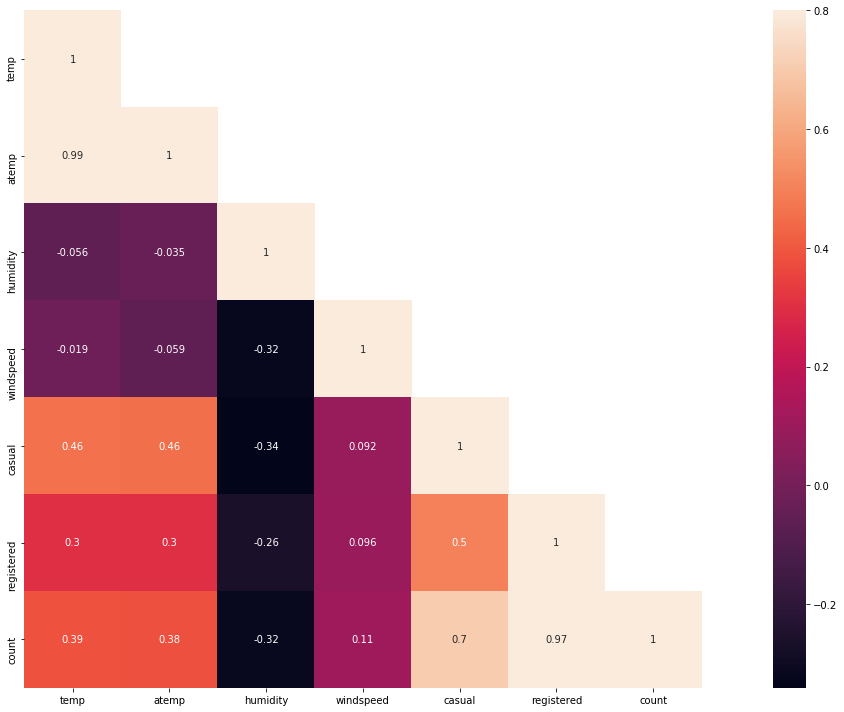

In [43]:
fig,ax= plt.subplots(figsize=(20,10))
sns.heatmap(correlation_matrix, mask=mask,vmax=.8, square=True,annot=True)
plt.tight_layout()

RegPlots

C:\Users\Harsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


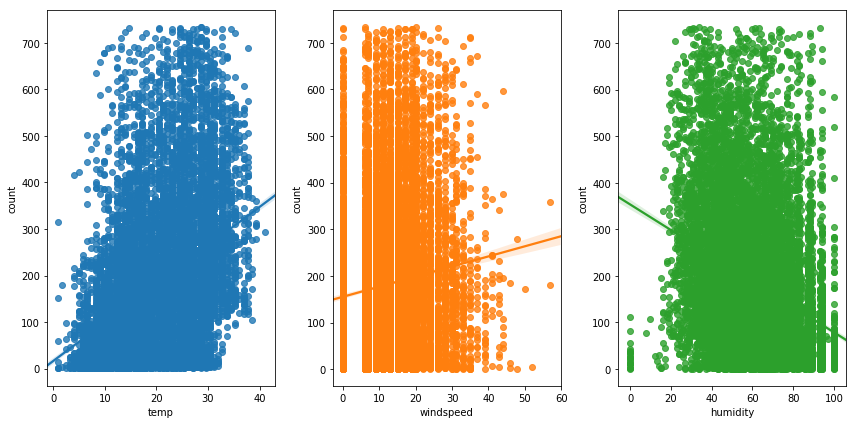

In [45]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,6))
sns.regplot(x="temp",y="count",data=dataset_without_outliers, ax=ax1)
sns.regplot(x="windspeed",y="count",data=dataset_without_outliers, ax=ax2)
sns.regplot(x="humidity",y="count",data=dataset_without_outliers, ax=ax3)
plt.tight_layout()

<h3> Inferences </h3>
<ol>
    <li>temp has a positive correlation with count, There is little dependency</li>
    <li>humidity has a negative correlation with count, There is little dependency</li>
    <li>windspeed has a very low correlation value with count, Thus very little dependency</li>
    <li>temp and atemp has strong correlation, Thus one of them should be dropped during model building to avoid multicollinearity  in the data.</li>
</ol>